<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Top-Model-Regression-Modeling/blob/main/RegressionModelling_circularFingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading and Preprocessing



# Circular Fingerprint Based Classification Modeling with model interpretation



## Introduction

Extended-connectivity Circular Fingerprint is a topological fingerprint developed particularly for structure-activity modeling. It is flexible, fast while calculations, and has the ability to featurize any number of molecular features. Not only can ECFP be adapted to different use cases, its ability to represent substructures makes analysis more interpretable(Rogers & Hahn, 2010).

In [ ]:
import multiprocessing

print("Number of CPU cores:", multiprocessing.cpu_count())

Number of CPU cores: 2


In [ ]:
# For Reporducibility
import numpy as np
np.random.seed(42)


In [ ]:
# Tpot requires numpy==1.23.3 as of june 2024
!pip install numpy==1.23.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.3 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.3 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.3 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/StandarizationOfDataset/StandarizedSmiles_cutOFF800daltonMolecularweight (1).xlsx')
df.head(5)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [ ]:
 df['pIC50']=np.log10(df['IC50'])

### Descriptor Generation




In [ ]:
df.to_csv('inhibitor.csv', index=False)

In [ ]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 24.8 MB/s eta 0:00:00


In [ ]:
import deepchem as dc
dataset_file = 'inhibitor.csv'
task = ['pIC50']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset = loader.create_dataset(dataset_file)

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset)
dataset = transformer.transform(dataset)

In [ ]:
dataset

<DiskDataset X.shape: (4077, 2048), y.shape: (4077, 1), w.shape: (4077, 1), task_names: ['pIC50']>

In [ ]:
pd_dataset=pd.DataFrame(dataset.X)
pd_dataset

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
# Create a dictionary to map old column names to new column names
column_rename_map = {old_column: f"fp_{old_column}" for old_column in pd_dataset.columns}

# Rename the columns
pd_dataset.rename(columns=column_rename_map, inplace=True)

In [ ]:
pd_dataset

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.concat([df, pd_dataset.loc[:, 'fp_0':]], axis=1)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Installing RDKit from PyPI
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 26.0 MB/s eta 0:00:00


In [ ]:
df.dropna(axis=1)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
feature1=df.loc[:, 'fp_0':]

In [ ]:
feature1

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target=df['pIC50']
target.head()

0    1.447158
1    1.986772
2    3.383815
3    2.000000
4    2.462398
Name: pIC50, dtype: float64

## AutoML Modeling

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=4cf5555141470eaf523bb0a86e509f09d4718e295e3639bd989be80d96bf2e78
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Import necessary libraries
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix,
    classification_report, precision_score, recall_score, f1_score,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib


# Split the data into training and test sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.20, random_state=42)
# Create an instance of TPOTClassifier with five fold cross validation
tpot = TPOTRegressor(generations=5, population_size=20, cv=5, random_state=42, verbosity=2)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)
# Get the best pipeline from TPOT
best_pipeline = tpot.fitted_pipeline_


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 476, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 1781, in fit
    mse_paths = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 67, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/loc

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 476, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 1781, in fit
    mse_paths = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 67, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/loc


Generation 1 - Current best internal CV score: -0.7221526313848801

Generation 2 - Current best internal CV score: -0.7221526313848801

Generation 3 - Current best internal CV score: -0.7120961128888554

Generation 4 - Current best internal CV score: -0.7120961128888554

Generation 5 - Current best internal CV score: -0.7120961128888554

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.1, min_samples_leaf=3, min_samples_split=7, n_estimators=100)


In [ ]:
joblib.dump(best_pipeline, 'best_pipeline_tpot_circularFingerprint_regression.pkl')

['best_pipeline_tpot_circularFingerprint_regression.pkl']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

# Predict on test data
y_pred = best_pipeline.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Modified R-squared (Optional, depending on the context)
n = len(y_test)
p = X_test.shape[1]
modified_r2 = 1 - ((1 - r2) * ((n - 1) / (n - p - 1)))

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Coefficient of Determination (COD)
cod = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Store metrics in a DataFrame
metrics_df = pd.DataFrame({
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae],
    'R2': [r2],
    'Modified R2': [modified_r2],
    'MAPE': [mape],
    'COD': [cod]
})

# Save metrics to Excel file
metrics_df.to_excel('evaluation_metrics_and_model_tpot1.xlsx', index=False)

# Save the best model parameters to the same Excel file
best_model_parameters = pd.DataFrame([best_pipeline.get_params()])
best_model_parameters.to_excel('evaluation_metrics_and_model_tpot.xlsx', sheet_name='Best_Model_Parameters', startrow=len(metrics_df)+2, index=False)

# Save the best model itself
joblib.dump(best_pipeline, 'best_model_tpot.pkl')

# Display all results
print("Metrics:")
print(metrics_df)
print("\nBest Model Parameters:")
print(best_model_parameters)
print("\nBest Model Saved as 'best_model_tpot.pkl'")
print("Metrics and Model Parameters Saved as 'evaluation_metrics_and_model_tpot.xlsx'")



Metrics:
        MSE      RMSE       MAE        R2  Modified R2  MAPE       COD
0  0.758909  0.871154  0.594709  0.691644      1.20382   inf  0.691644

Best Model Parameters:
  memory                                              steps  verbose  \
0   None  [(randomforestregressor, (DecisionTreeRegresso...    False   

                               randomforestregressor  \
0  (DecisionTreeRegressor(max_features=0.1, min_s...   

   randomforestregressor__bootstrap  randomforestregressor__ccp_alpha  \
0                             False                               0.0   

  randomforestregressor__criterion randomforestregressor__max_depth  \
0                    squared_error                             None   

   randomforestregressor__max_features randomforestregressor__max_leaf_nodes  \
0                                  0.1                                  None   

   ... randomforestregressor__min_samples_leaf  \
0  ...                                       3   

   randomforest

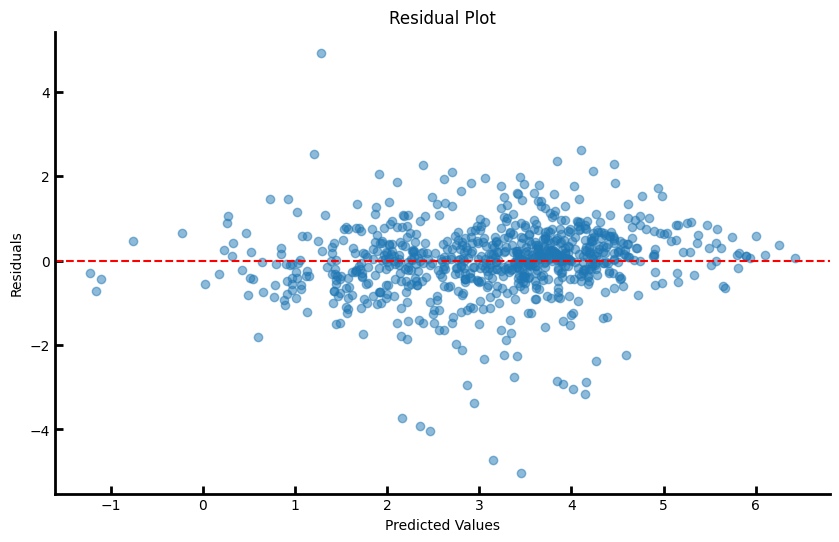

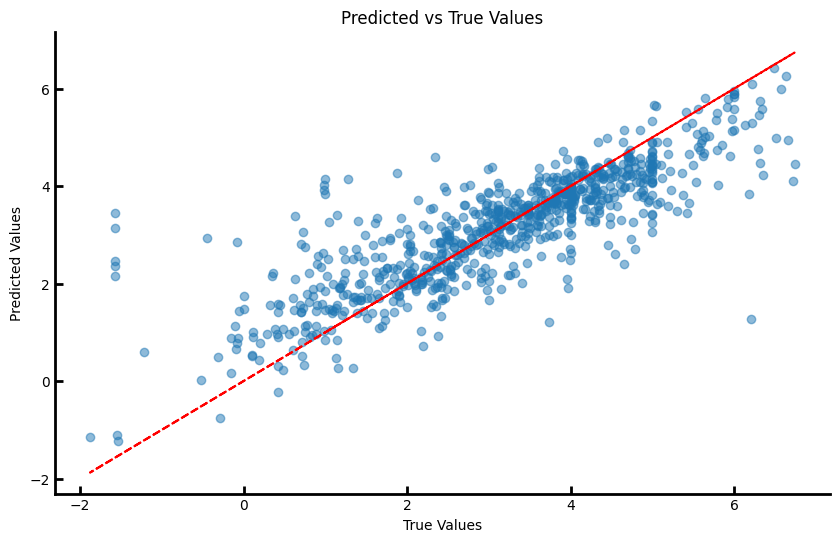

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tick_params(axis='both', which='both', direction='in', length=6, width=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()

# y_pred vs y_true plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.tick_params(axis='both', which='both', direction='in', length=6, width=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()


## Aggregrate modelling and evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    HistGradientBoostingRegressor,
)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

def print_evaluation_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    print(f"Evaluation Metrics - {model_name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    return mse, rmse, r2

# Initialize lists and dictionaries to store results
best_models = {}
best_model_results = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.15, random_state=42)

# Use StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary of models to loop through
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'MLP': MLPRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bagging': BaggingRegressor(),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100),
    'HistGradientBoosting': HistGradientBoostingRegressor(max_iter=100)
}

# Define hyperparameters for Grid Search for each model
param_grid = {
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50)]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    'Bagging': {},
    'Extra Trees': {'n_estimators': [100, 200, 300]},
    'HistGradientBoosting': {'max_iter': [100, 200, 300]}
}

# Initialize variables to track the best model and its performance
best_model_name = None
best_rmse = float('inf')

# Loop through each model, perform Grid Search, calculate metrics, and create visualizations
for model_name, model in models.items():
    # Initialize current_best_hyperparameters outside the if condition
    current_best_hyperparameters = None

    if model_name in param_grid:
        # Perform Grid Search for hyperparameter optimization
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train)
        current_best_model = grid_search.best_estimator_
        current_best_hyperparameters = grid_search.best_params_
        print(f"Best Hyperparameters for {model_name}: {current_best_hyperparameters}")
    else:
        current_best_model = model

    # Train the current best model on the training data
    current_best_model.fit(X_train_scaled, y_train)

    # Cross-validation scores
    cv_scores = cross_val_score(current_best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean = -np.mean(cv_scores)
    cv_std = np.std(cv_scores)
    cv_ci = 1.96 * cv_std / np.sqrt(len(cv_scores))  # 95% confidence interval

    # Make predictions on the test data
    y_test_pred = current_best_model.predict(X_test_scaled)

    # Calculate evaluation metrics for test set
    mse, rmse, r2 = print_evaluation_metrics(y_test, y_test_pred, model_name)

    # Update best model if the current model has lower RMSE
    if rmse < best_rmse:
        best_model_name = model_name
        best_rmse = rmse
        best_model = current_best_model
        best_y_test_pred = y_test_pred

    # Store the best model for each model
    best_models[model_name] = {
        'model': current_best_model,
        'hyperparameters': current_best_hyperparameters,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_ci': cv_ci
    }

    # Append results to best_model_results list for DataFrame creation
    best_model_results.append({
        'Model': model_name,
        'Best Hyperparameters': current_best_hyperparameters,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r2,
        'CV Mean': cv_mean,
        'CV Std': cv_std,
        'CV CI': cv_ci
    })

    # Add hyperparameters to the current best model DataFrame
    current_best_model_df = pd.DataFrame([best_models[model_name]])
    current_best_model_df['Hyperparameters'] = [current_best_hyperparameters]

    # Save the current best model results to an Excel file
    current_best_model_df.to_excel(f'{model_name}_best_model_results.xlsx', index=False)
    print(f"Best model results for {model_name} saved to '{model_name}_best_model_results.xlsx'.")

# Save all best model results to a single Excel file
all_best_models_df = pd.DataFrame(best_model_results)
all_best_models_df.to_excel('all_best_models_results.xlsx', index=False)
print("All best model results saved to 'all_best_models_results.xlsx'.")


Evaluation Metrics - Linear Regression:
Mean Squared Error: 1.7087507186353017
Root Mean Squared Error: 1.3071919211176688
R-squared: 0.26298234539945997
Best model results for Linear Regression saved to 'Linear Regression_best_model_results.xlsx'.
Best Hyperparameters for Random Forest: {'n_estimators': 100}
Evaluation Metrics - Random Forest:
Mean Squared Error: 0.730665073019036
Root Mean Squared Error: 0.8547894904706281
R-squared: 0.684849842319243
Best model results for Random Forest saved to 'Random Forest_best_model_results.xlsx'.
Best Hyperparameters for MLP: {'hidden_layer_sizes': (50, 50)}


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x789b9a3bcf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so: cannot open shared object file: No such file or directory


Evaluation Metrics - MLP:
Mean Squared Error: 1.0285125755485667
Root Mean Squared Error: 1.0141560903276017
R-squared: 0.5563823804777273
Best model results for MLP saved to 'MLP_best_model_results.xlsx'.
Best Hyperparameters for K-Nearest Neighbors: {'n_neighbors': 3}
Evaluation Metrics - K-Nearest Neighbors:
Mean Squared Error: 0.8571667898684827
Root Mean Squared Error: 0.9258330248314124
R-squared: 0.6302871740268297
Best model results for K-Nearest Neighbors saved to 'K-Nearest Neighbors_best_model_results.xlsx'.
Best Hyperparameters for Decision Tree: {'max_depth': 20}
Evaluation Metrics - Decision Tree:
Mean Squared Error: 1.259803278166159
Root Mean Squared Error: 1.1224095857422811
R-squared: 0.4566221701000126
Best model results for Decision Tree saved to 'Decision Tree_best_model_results.xlsx'.
Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 300}
Evaluation Metrics - Gradient Boosting:
Mean Squared Error: 0.8289770134583503
Root Mean Squar

### Visualization of aggregragte performance by residual plot and ypredvsytrue plot

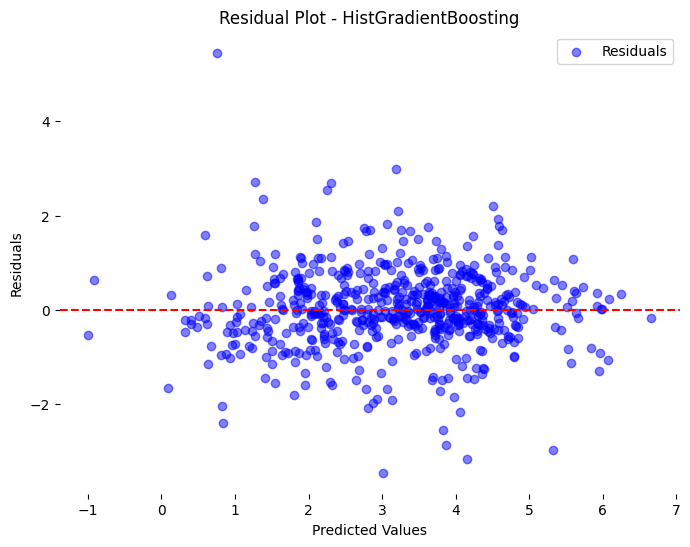

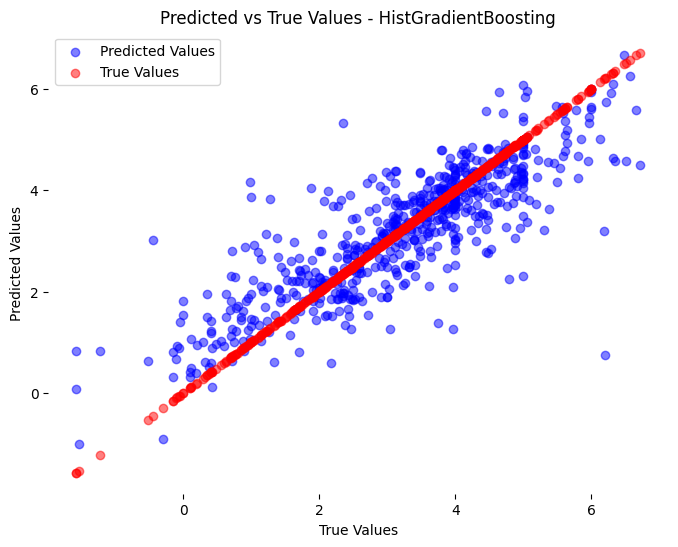

In [ ]:
# Residual Plot for Best Model
def plot_residuals_best_model(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5, label='Residuals')
    plt.title(f"Residual Plot - {best_model_name}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.legend()
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box around plot
    plt.savefig(f"residual_plot_{best_model_name}.png")  # Save the plot
    plt.show()

# Plot Predicted vs True Values for Best Model
def plot_predicted_vs_true_best_model(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5, label='Predicted Values')
    plt.scatter(y_true, y_true, color='red', alpha=0.5, label='True Values')
    plt.title(f"Predicted vs True Values - {best_model_name}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box around plot
    plt.savefig(f"predicted_vs_true_values_plot_{best_model_name}.png")  # Save the plot
    plt.show()

# Plot residual plot and predicted vs true values for the best model
plot_residuals_best_model(y_test, best_y_test_pred)
plot_predicted_vs_true_best_model(y_test, best_y_test_pred)


In [ ]:
import joblib

# Assuming 'best_model' contains the best model found
joblib.dump(best_model, 'best_model_aggregrate_regression.pkl')
print("Best model saved to 'best_model.pkl'.")

Best model saved to 'best_model.pkl'.


## Cross species evaluation

### Upload and prep for species dataset



In [ ]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/species final dataset/df_humanIndependent_tpot_final.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/species final dataset/df_eel_tpot_final.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/species final dataset/df_mouse_tpot_final.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/species final dataset/df_cow_tpot_final.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/species final dataset/df_ray_tpot_final.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/species final dataset/df_mosquito_tpot_final.xlsx')

In [ ]:
df_humanIndependent['pIC50']=np.log10(df_humanIndependent['IC50'])
df_eel['pIC50']=np.log10(df_eel['IC50'])
df_mouse['pIC50']=np.log10(df_mouse['IC50'])
df_cow['pIC50']=np.log10(df_cow['IC50'])
df_ray['pIC50']=np.log10(df_ray['IC50'])
df_mosquito['pIC50']=np.log10(df_mosquito['IC50'])


In [ ]:
df_humanIndependent=df_humanIndependent[['cleanedMol',	'pIC50',	'cleanedMol']]

### Descriptor generation

In [ ]:
df_humanIndependent.to_csv('inhibitor_HumanIndependent.csv', index=False)
df_eel.to_csv('inhibitor_eel.csv', index=False)
df_mouse.to_csv('inhibitor_mouse.csv', index=False)
df_cow.to_csv('inhibitor_cow.csv', index=False)
df_ray.to_csv('inhibitor_ray.csv', index=False)
df_mosquito.to_csv('inhibitor_mosquito.csv', index=False)

In [ ]:
dataset_file = 'inhibitor_HumanIndependent.csv'
task = ['pIC50']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_HumanIndependent = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_HumanIndependent)
dataset_HumanIndependent = transformer.transform(dataset_HumanIndependent)

In [ ]:
dataset_file = 'inhibitor_eel.csv'
task = ['pIC50']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_eel = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_eel)
dataset_eel = transformer.transform(dataset_eel)

In [ ]:
dataset_file = 'inhibitor_mouse.csv'
task = ['pIC50']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mouse = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mouse)
dataset_mouse = transformer.transform(dataset_mouse)

In [ ]:
dataset_file = 'inhibitor_ray.csv'
task = ['pIC50']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_ray = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_ray)
dataset_ray = transformer.transform(dataset_ray)

In [ ]:
dataset_file = 'inhibitor_cow.csv'
task = ['pIC50']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_cow = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_cow)
dataset_cow = transformer.transform(dataset_cow)

In [ ]:
dataset_file = 'inhibitor_mosquito.csv'
task = ['pIC50']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mosquito = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mosquito)
dataset_mosquito = transformer.transform(dataset_mosquito)

### Test dataset preparation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.20, random_state=42)


In [ ]:
X_test

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
1749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2685,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3937,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df_= pd.merge(df[['cleanedMol','classLabel','pIC50']], X_test, left_index=True, right_index=True, how='inner')

In [ ]:
test_df_.rename(columns={'classLabel': 'single-class-label'}, inplace=True)

In [ ]:
test_df_

,cleanedMol,classLabel,pIC50,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,...,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047
6,Nc1c2c(nc3ccccc13)CCCC2,1,1.654177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2,1,0.748188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1,0,3.260071,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1,0,4.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl,0,5.636488,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(C...,0,3.008600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4064,CNc1nc(NCCc2ccccc2)c2ccccc2n1,0,3.939519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4070,CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(...,0,4.268344,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4071,O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21,1,1.899985,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df_.to_csv('inhibitor_test.csv', index=False)

In [ ]:
dataset_file = 'inhibitor_test.csv'
task = ['pIC50']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
test_dataset = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=test_dataset)
test_dataset = transformer.transform(test_dataset)

In [ ]:
test_dataset

<DiskDataset X.shape: (816, 2048), y.shape: (816, 1), w.shape: (816, 1), ids: ['Nc1c2c(nc3ccccc13)CCCC2' 'O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2'
 'COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1' ...
 'CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)[C@H]1O'
 'O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21'
 'COc1cccc2cc[n+](-c3ccc(C)cc3)cc12'], task_names: ['pIC50']>

### Evaulation of cross species dataset on tpot model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
plt.figure(figsize=(10, 6))

for species, data in datasets.items():
     # Assuming data.X is a 2D array (matrix)
    X = data.X
    y = data.y

    # Predict on the test set using the pre-fitted model
    y_pred = best_pipeline.predict(X)  # Assuming best_pipeline is already fitted

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, color='blue', alpha=0.7, label='RMSE: {:.2f}, R Squared: {:.2f}'.format(rmse, r2))
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # No label for fit line
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.title(f'True vs. Predicted Values for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', fontsize=12)  # Moved the label to the far-left corner
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box
    plt.tight_layout()
    plt.savefig(f'y_pred_vs_y_true_{species}.png', dpi=300)
    plt.close()

   # Plot residual plot
    residuals = y.flatten() - y_pred  # Convert to 1D array using flatten()
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y.flatten(), y=residuals, lowess=True, color="blue", scatter_kws={'alpha': 0.7, 's': 60})
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Residuals', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f'Residual Plot for {species}')  # Removed R-squared and RMSE from the title
    plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box
    plt.tight_layout()
    plt.savefig(f'residual_plot_{species}.png', dpi=300)
    plt.close()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_tpot.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


NameError: name 'best_pipeline' is not defined

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScal

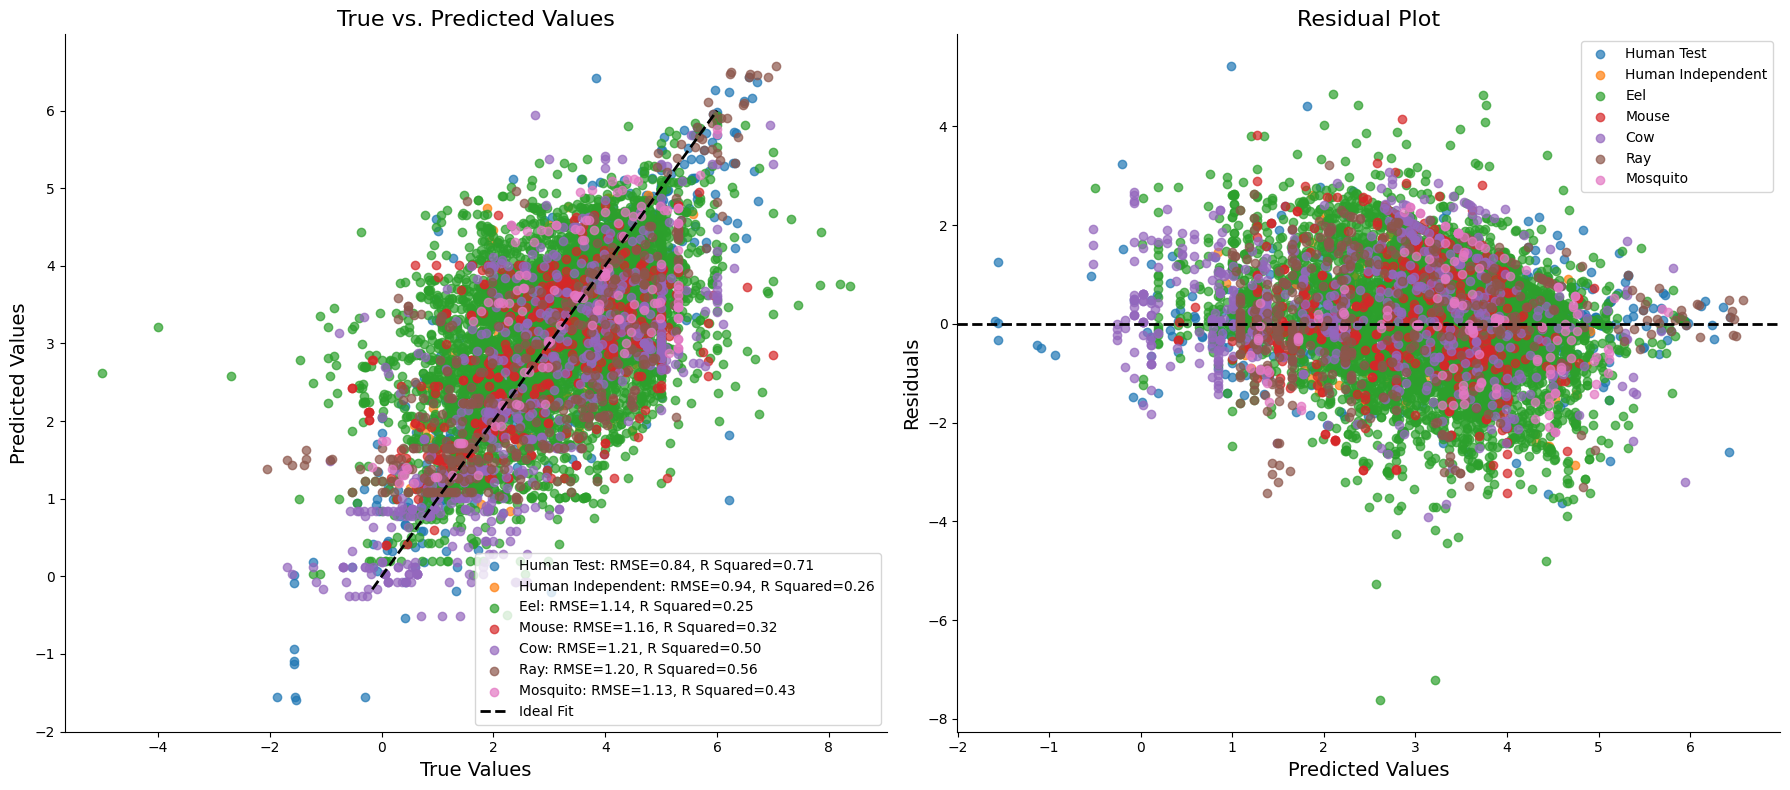

Evaluation for Human Test dataset:
MSE: 0.7109
RMSE: 0.8432
MAE: 0.5789
R2: 0.7111
Evaluation for Human Independent dataset:
MSE: 0.8893
RMSE: 0.9430
MAE: 0.7510
R2: 0.2574
Evaluation for Eel dataset:
MSE: 1.2907
RMSE: 1.1361
MAE: 0.8765
R2: 0.2508
Evaluation for Mouse dataset:
MSE: 1.3449
RMSE: 1.1597
MAE: 0.8935
R2: 0.3192
Evaluation for Cow dataset:
MSE: 1.4697
RMSE: 1.2123
MAE: 0.9583
R2: 0.5015
Evaluation for Ray dataset:
MSE: 1.4400
RMSE: 1.2000
MAE: 0.9311
R2: 0.5627
Evaluation for Mosquito dataset:
MSE: 1.2730
RMSE: 1.1283
MAE: 0.9119
R2: 0.4344

Combined Evaluation Metrics:
                        MSE      RMSE       MAE        R2
Human Test         0.710945  0.843176  0.578885  0.711132
Human Independent  0.889280  0.943017  0.750998  0.257383
Eel                1.290696  1.136088  0.876492  0.250829
Mouse              1.344927  1.159710  0.893479  0.319151
Cow                1.469734  1.212326  0.958283  0.501501
Ray                1.439973  1.199989  0.931081  0.562705
Mosq

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot y_pred vs. y_true
ax = axs[0]
for species, data in datasets.items():
    X = data.X
    y = data.y

    # Predict on the test set using the pre-fitted model
    y_pred = best_pipeline.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    ax.scatter(y, y_pred, label=f'{species}: RMSE={rmse:.2f}, R Squared={r2:.2f}', alpha=0.7)

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')  # No label for fit line
ax.set_xlabel('True Values', fontsize=14)
ax.set_ylabel('Predicted Values', fontsize=14)
ax.set_title('True vs. Predicted Values', fontsize=16)
ax.legend(loc='lower right', fontsize=10)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot residual plot
ax = axs[1]
for species, data in datasets.items():
    X = data.X
    y = data.y

    # Predict on the test set using the pre-fitted model
    y_pred = best_pipeline.predict(X)

    # Flatten y to match the shape of y_pred
    y_flat = y.flatten()

    # Plot residual plot
    residuals = y_flat - y_pred.flatten()

    ax.scatter(y_pred, residuals, label=f'{species}', alpha=0.7)  # Plot y_pred against residuals instead of y

ax.axhline(y=0, color='k', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Values', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax.set_title('Residual Plot', fontsize=16)
ax.legend(loc='upper right', fontsize=10)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('all_species_plots.png', dpi=300)
plt.show()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_tpot.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


### Evaluation on aggregrate model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
plt.figure(figsize=(10, 6))

for species, data in datasets.items():
    # Assuming data.X is a 2D array (matrix)
    X = data.X
    y = data.y

    # Predict on the test set using the pre-fitted model
    y_pred = current_best_model.predict(X)  # Assuming best_pipeline is already fitted

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    plt.scatter(y, y_pred, color='blue', alpha=0.7, label='RMSE: {:.2f}, R Squared: {:.2f}'.format(rmse, r2))
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # No label for fit line
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.title(f'True vs. Predicted Values for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', fontsize=12)  # Moved the label to the far-left corner
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box
    plt.tight_layout()
    plt.savefig(f'y_pred_vs_y_true_{species}.png', dpi=300)
    plt.close()

    # Plot residual plot
    residuals = y.flatten() - y_pred  # Convert to 1D array using flatten()
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y.flatten(), y=residuals, lowess=True, color="blue", scatter_kws={'alpha': 0.7, 's': 60})
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Residuals', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f'Residual Plot for {species}')  # Removed R-squared and RMSE from the title
    plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box
    plt.tight_layout()
    plt.savefig(f'residual_plot_{species}.png', dpi=300)
    plt.close()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_tpot.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


Evaluation for Human Test dataset:
MSE: 2.3349
RMSE: 1.5280
MAE: 1.1767
R2: 0.0513
Evaluation for Human Independent dataset:
MSE: 1.0601
RMSE: 1.0296
MAE: 0.7820
R2: 0.1147
Evaluation for Eel dataset:
MSE: 1.6642
RMSE: 1.2900
MAE: 1.0280
R2: 0.0340
Evaluation for Mouse dataset:
MSE: 2.1434
RMSE: 1.4640
MAE: 1.1920
R2: -0.0851
Evaluation for Cow dataset:
MSE: 3.1815
RMSE: 1.7837
MAE: 1.4668
R2: -0.0791
Evaluation for Ray dataset:
MSE: 2.8071
RMSE: 1.6754
MAE: 1.3627
R2: 0.1475
Evaluation for Mosquito dataset:
MSE: 2.3505
RMSE: 1.5331
MAE: 1.2535
R2: -0.0443
Evaluation for Human Test dataset:
MSE: 2.3349
RMSE: 1.5280
MAE: 1.1767
R2: 0.0513
Evaluation for Human Independent dataset:
MSE: 1.0601
RMSE: 1.0296
MAE: 0.7820
R2: 0.1147
Evaluation for Eel dataset:
MSE: 1.6642
RMSE: 1.2900
MAE: 1.0280
R2: 0.0340
Evaluation for Mouse dataset:
MSE: 2.1434
RMSE: 1.4640
MAE: 1.1920
R2: -0.0851
Evaluation for Cow dataset:
MSE: 3.1815
RMSE: 1.7837
MAE: 1.4668
R2: -0.0791
Evaluation for Ray dataset:
MSE:

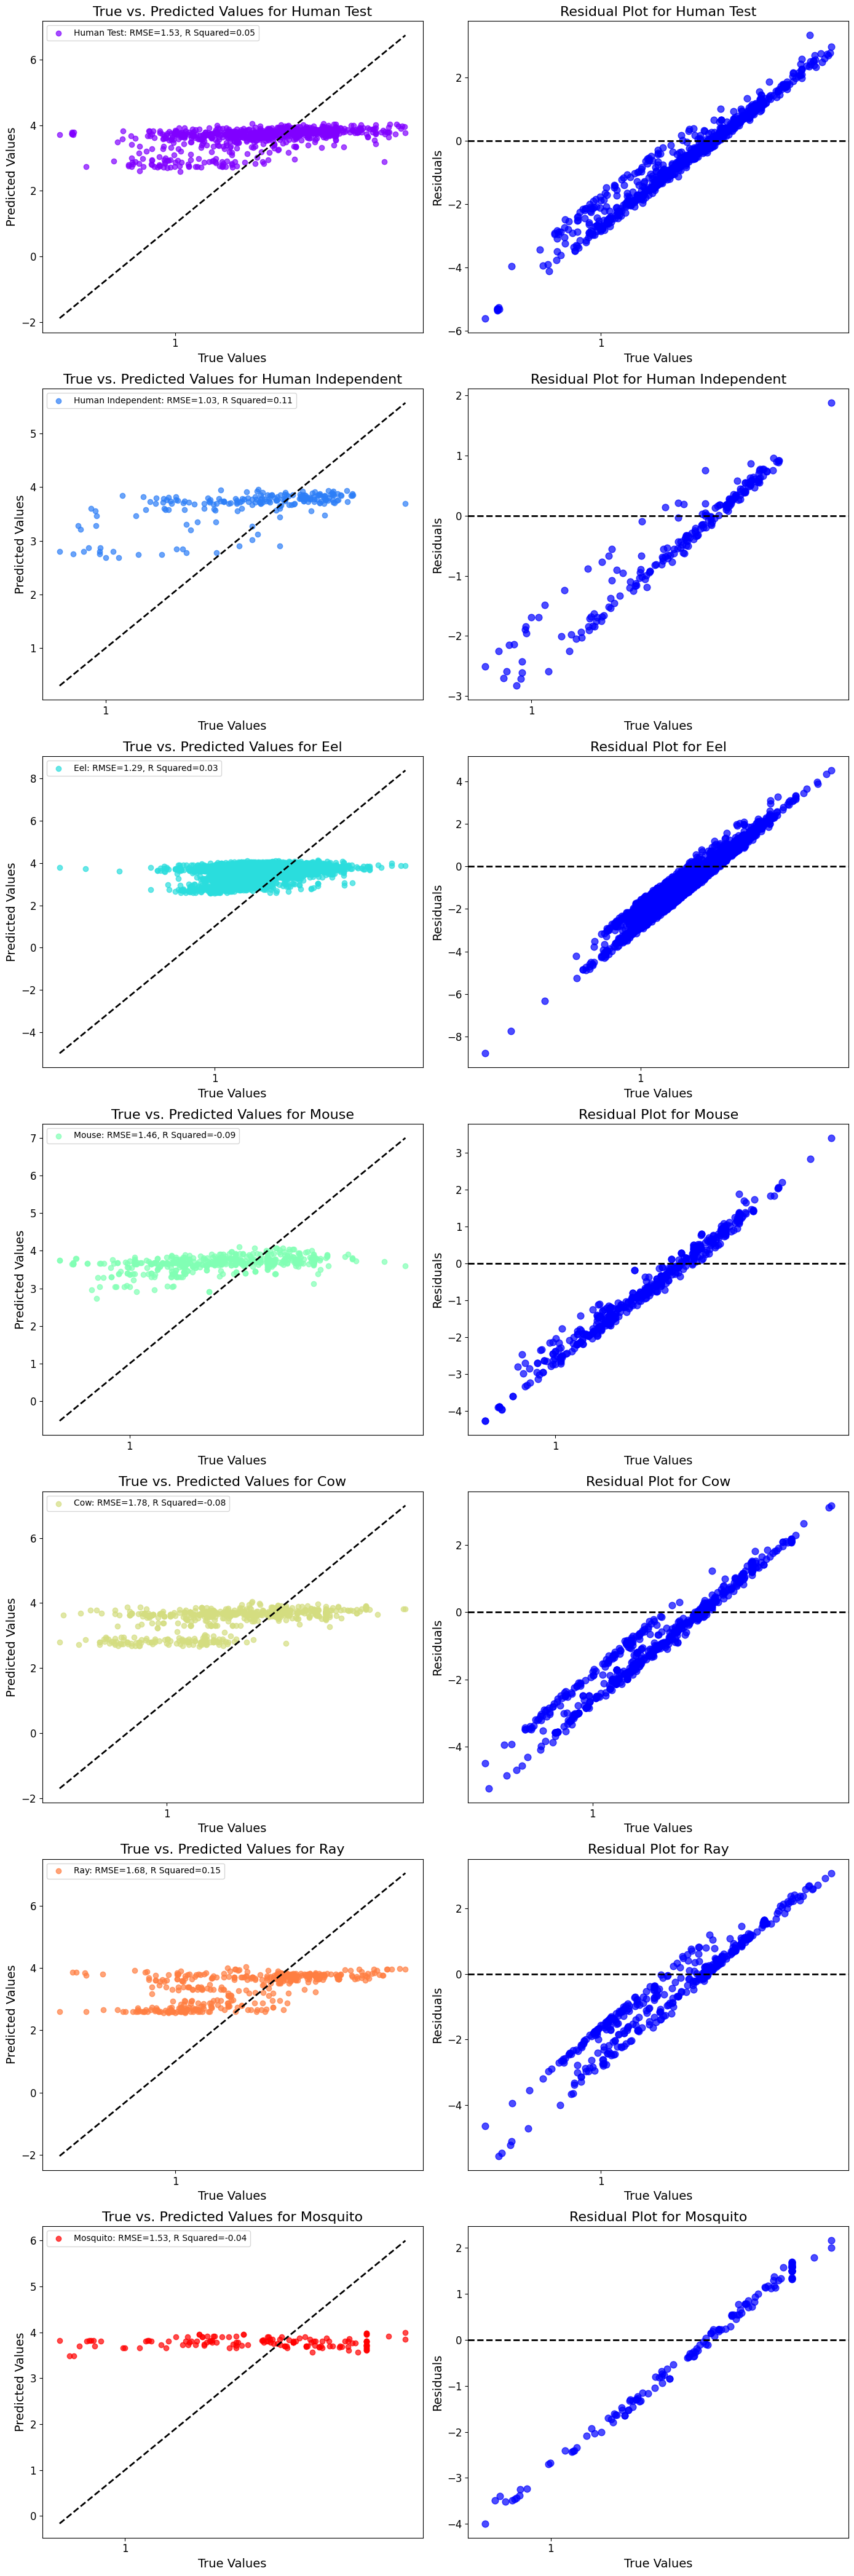

Evaluation for Human Test dataset:
MSE: 2.3349
RMSE: 1.5280
MAE: 1.1767
R2: 0.0513
Evaluation for Human Independent dataset:
MSE: 1.0601
RMSE: 1.0296
MAE: 0.7820
R2: 0.1147
Evaluation for Eel dataset:
MSE: 1.6642
RMSE: 1.2900
MAE: 1.0280
R2: 0.0340
Evaluation for Mouse dataset:
MSE: 2.1434
RMSE: 1.4640
MAE: 1.1920
R2: -0.0851
Evaluation for Cow dataset:
MSE: 3.1815
RMSE: 1.7837
MAE: 1.4668
R2: -0.0791
Evaluation for Ray dataset:
MSE: 2.8071
RMSE: 1.6754
MAE: 1.3627
R2: 0.1475
Evaluation for Mosquito dataset:
MSE: 2.3505
RMSE: 1.5331
MAE: 1.2535
R2: -0.0443

Combined Evaluation Metrics:
                        MSE      RMSE       MAE        R2
Human Test         2.334924  1.528046  1.176696  0.051285
Human Independent  1.060114  1.029619  0.781952  0.114724
Eel                1.664209  1.290042  1.028038  0.034027
Mouse              2.143402  1.464036  1.191966 -0.085065
Cow                3.181516  1.783680  1.466815 -0.079095
Ray                2.807072  1.675432  1.362655  0.147540
M

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}
# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
fig, axs = plt.subplots(nrows=len(datasets), ncols=2, figsize=(14, 6 * len(datasets)))

colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(datasets))))

for i, (species, data) in enumerate(datasets.items()):

    X = data.X
    y = data.y

    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X)
    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    color = next(colors)
    axs[i, 0].scatter(y, y_pred, color=color, alpha=0.7, label=f'{species}: RMSE={rmse:.2f}, R Squared={r2:.2f}')
    axs[i, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # No label for fit line
    axs[i, 0].set_xlabel('True Values', fontsize=14)
    axs[i, 0].set_ylabel('Predicted Values', fontsize=14)
    axs[i, 0].set_title(f'True vs. Predicted Values for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    axs[i, 0].tick_params(axis='both', which='major', labelsize=12)
    axs[i, 0].legend(loc='upper left', fontsize=10)  # Moved the label to the far-left corner
    axs[i, 0].grid(False)  # Remove grid
    axs[i, 0].boxplot([], showmeans=False)   # Remove box

    # Flatten y if it's a 2D array
    if len(y.shape) > 1:
        y = y.flatten()

    # Calculate residuals and convert to 1D array
    residuals = (y - y_pred).flatten()

    # Scatter plot of residuals
    axs[i, 1].scatter(y, residuals, color='blue', alpha=0.7, s=60)
    axs[i, 1].axhline(y=0, color='k', linestyle='--', linewidth=2)
    axs[i, 1].set_xlabel('True Values', fontsize=14)
    axs[i, 1].set_ylabel('Residuals', fontsize=14)
    axs[i, 1].set_title(f'Residual Plot for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    axs[i, 1].tick_params(axis='both', which='major', labelsize=12)
    axs[i, 1].grid(False)  # Remove grid
    axs[i, 1].boxplot([], showmeans=False)   # Remove boxplot

plt.tight_layout()
plt.savefig('all_species_plots.png', dpi=300)
plt.show()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_tpot.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


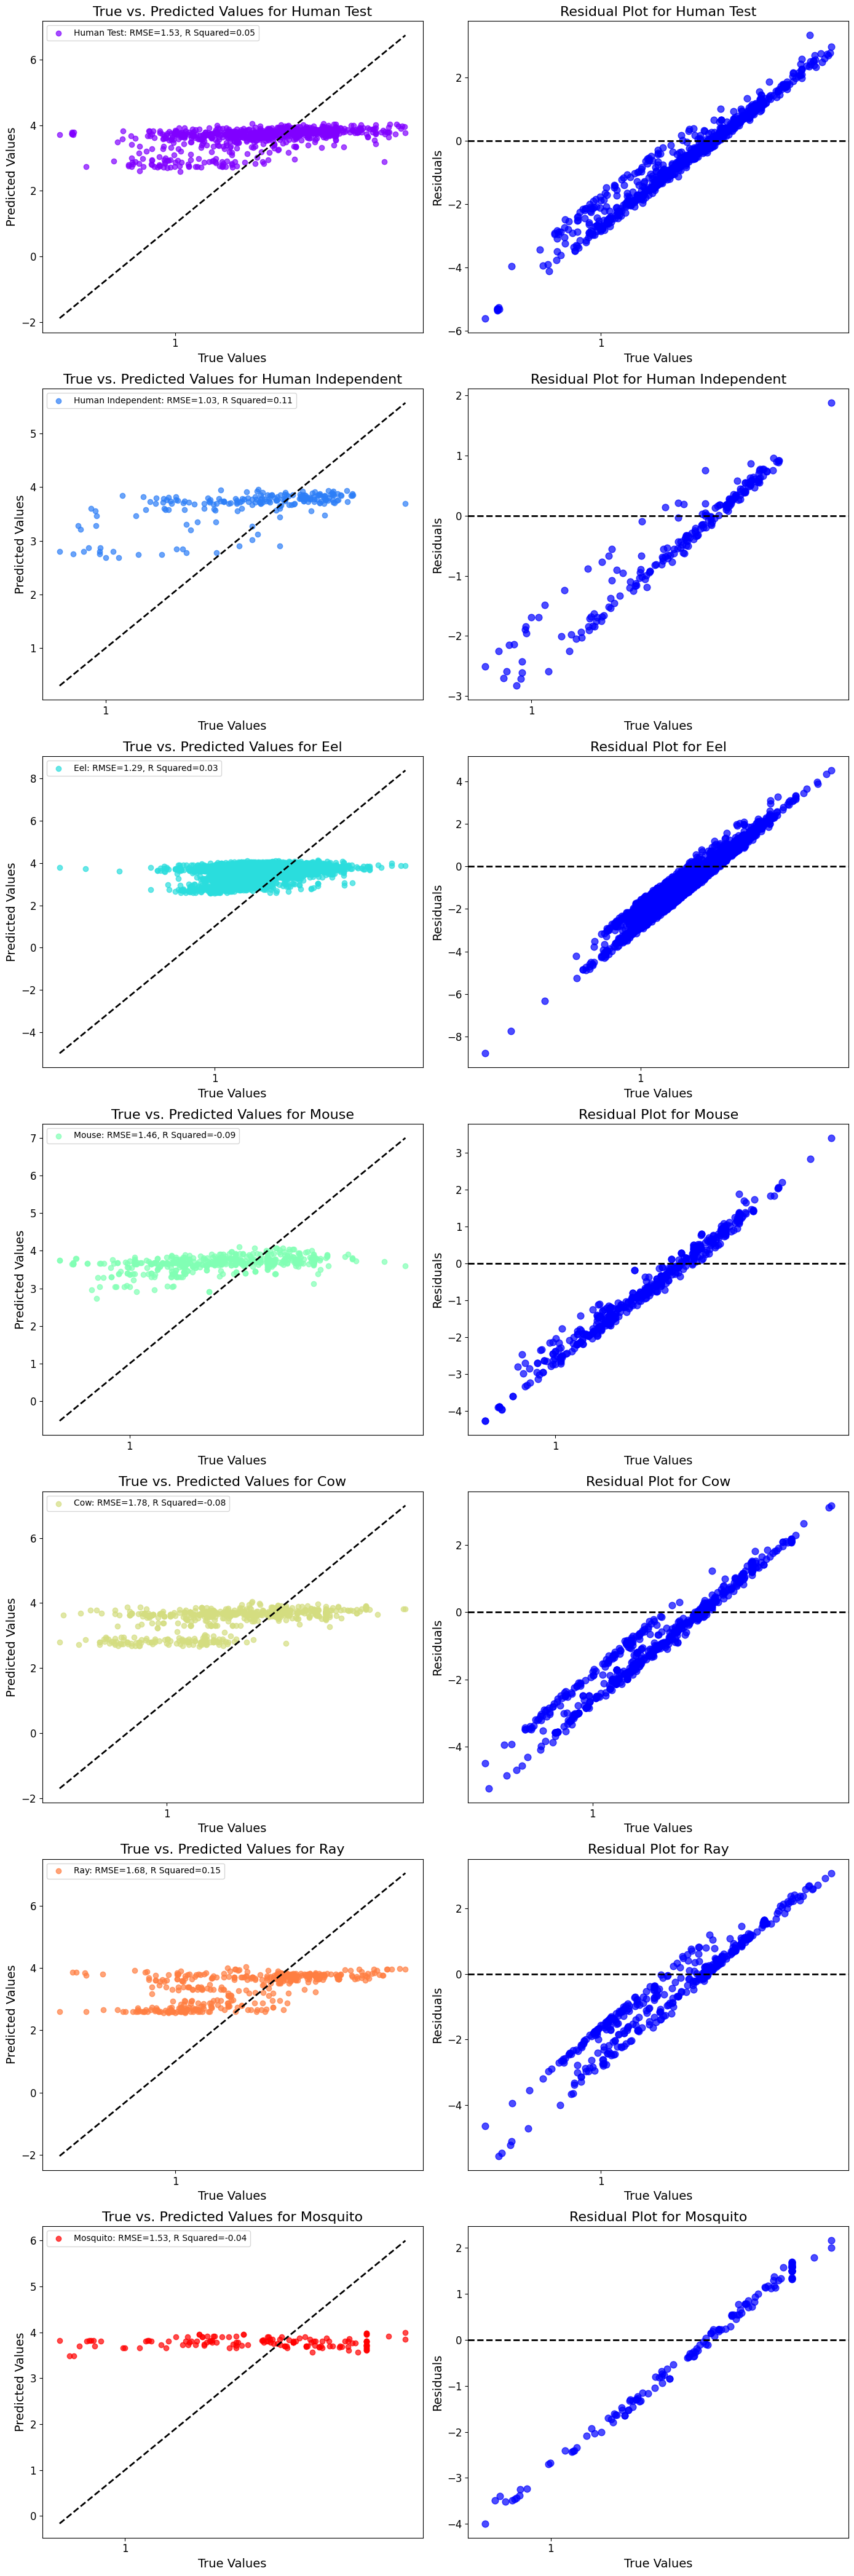

Evaluation for Human Test dataset:
MSE: 2.3349
RMSE: 1.5280
MAE: 1.1767
R2: 0.0513
Evaluation for Human Independent dataset:
MSE: 1.0601
RMSE: 1.0296
MAE: 0.7820
R2: 0.1147
Evaluation for Eel dataset:
MSE: 1.6642
RMSE: 1.2900
MAE: 1.0280
R2: 0.0340
Evaluation for Mouse dataset:
MSE: 2.1434
RMSE: 1.4640
MAE: 1.1920
R2: -0.0851
Evaluation for Cow dataset:
MSE: 3.1815
RMSE: 1.7837
MAE: 1.4668
R2: -0.0791
Evaluation for Ray dataset:
MSE: 2.8071
RMSE: 1.6754
MAE: 1.3627
R2: 0.1475
Evaluation for Mosquito dataset:
MSE: 2.3505
RMSE: 1.5331
MAE: 1.2535
R2: -0.0443

Combined Evaluation Metrics:
                        MSE      RMSE       MAE        R2
Human Test         2.334924  1.528046  1.176696  0.051285
Human Independent  1.060114  1.029619  0.781952  0.114724
Eel                1.664209  1.290042  1.028038  0.034027
Mouse              2.143402  1.464036  1.191966 -0.085065
Cow                3.181516  1.783680  1.466815 -0.079095
Ray                2.807072  1.675432  1.362655  0.147540
M

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}
# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
fig, axs = plt.subplots(nrows=len(datasets), ncols=2, figsize=(14, 6 * len(datasets)))

colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(datasets))))

for i, (species, data) in enumerate(datasets.items()):
    X = data.X
    y = data.y

    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    color = next(colors)
    axs[i, 0].scatter(y, y_pred, color=color, alpha=0.7, label=f'{species}: RMSE={rmse:.2f}, R Squared={r2:.2f}')
    axs[i, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # No label for fit line
    axs[i, 0].set_xlabel('True Values', fontsize=14)
    axs[i, 0].set_ylabel('Predicted Values', fontsize=14)
    axs[i, 0].set_title(f'True vs. Predicted Values for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    axs[i, 0].tick_params(axis='both', which='major', labelsize=12)
    axs[i, 0].legend(loc='upper left', fontsize=10)  # Moved the label to the far-left corner
    axs[i, 0].grid(False)  # Remove grid
    axs[i, 0].boxplot([], showmeans=False)   # Remove box

    # Flatten y if it's a 2D array
    if len(y.shape) > 1:
        y = y.flatten()

    # Calculate residuals and convert to 1D array
    residuals = (y - y_pred).flatten()

    # Scatter plot of residuals
    axs[i, 1].scatter(y, residuals, color='blue', alpha=0.7, s=60)
    axs[i, 1].axhline(y=0, color='k', linestyle='--', linewidth=2)
    axs[i, 1].set_xlabel('True Values', fontsize=14)
    axs[i, 1].set_ylabel('Residuals', fontsize=14)
    axs[i, 1].set_title(f'Residual Plot for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    axs[i, 1].tick_params(axis='both', which='major', labelsize=12)
    axs[i, 1].grid(False)  # Remove grid
    axs[i, 1].boxplot([], showmeans=False)   # Remove boxplot

plt.tight_layout()
plt.savefig('all_species_plots.png', dpi=300)
plt.show()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_aggregrate.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


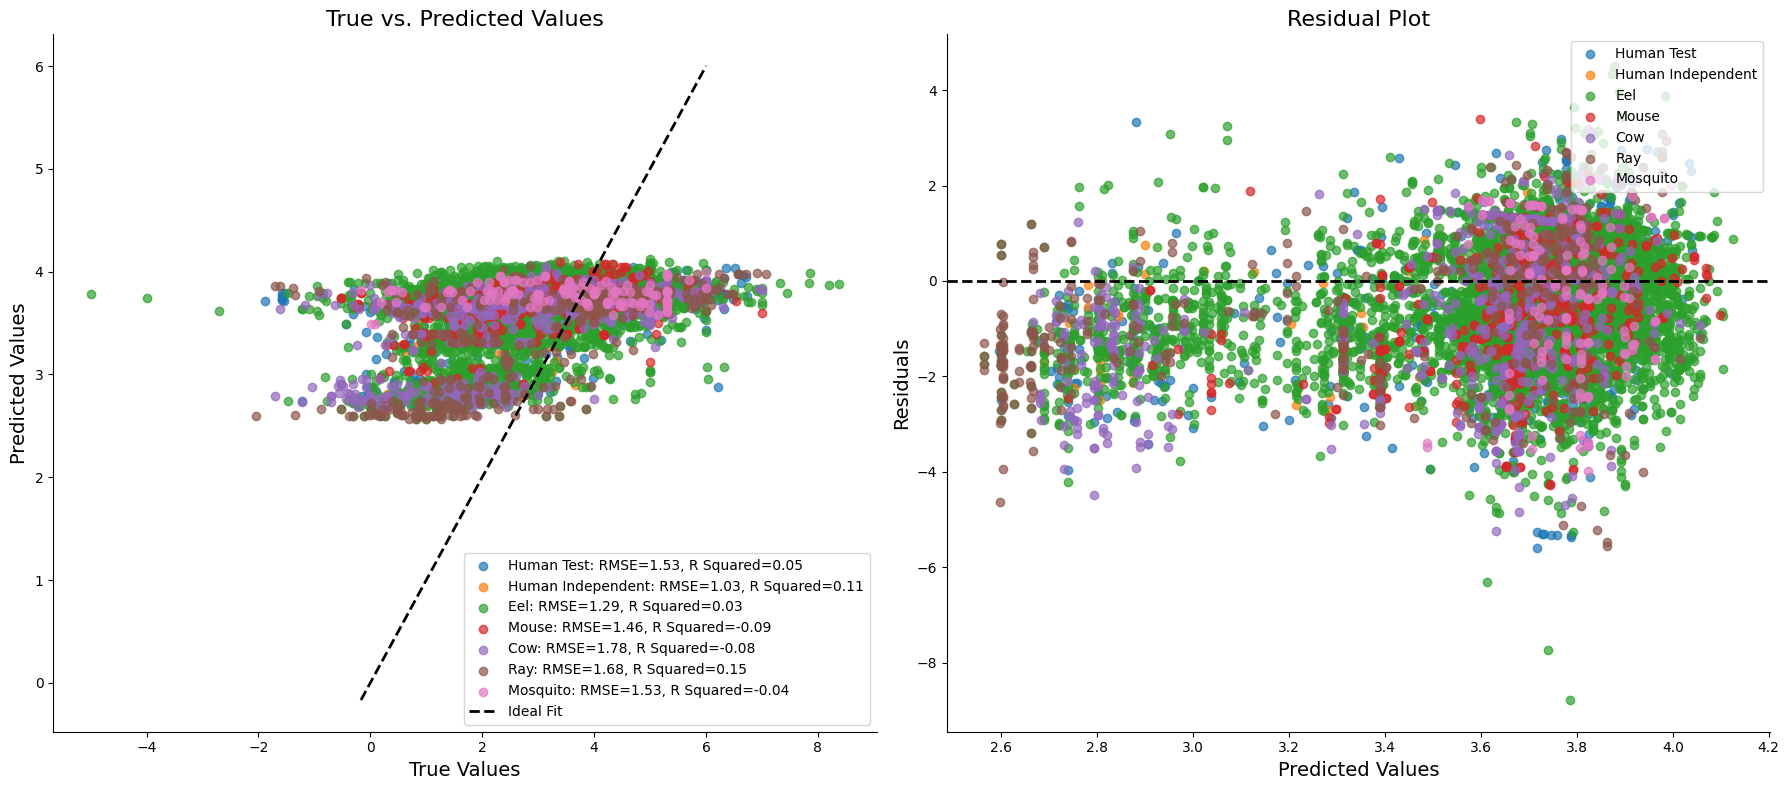

Evaluation for Human Test dataset:
MSE: 2.3349
RMSE: 1.5280
MAE: 1.1767
R2: 0.0513
Evaluation for Human Independent dataset:
MSE: 1.0601
RMSE: 1.0296
MAE: 0.7820
R2: 0.1147
Evaluation for Eel dataset:
MSE: 1.6642
RMSE: 1.2900
MAE: 1.0280
R2: 0.0340
Evaluation for Mouse dataset:
MSE: 2.1434
RMSE: 1.4640
MAE: 1.1920
R2: -0.0851
Evaluation for Cow dataset:
MSE: 3.1815
RMSE: 1.7837
MAE: 1.4668
R2: -0.0791
Evaluation for Ray dataset:
MSE: 2.8071
RMSE: 1.6754
MAE: 1.3627
R2: 0.1475
Evaluation for Mosquito dataset:
MSE: 2.3505
RMSE: 1.5331
MAE: 1.2535
R2: -0.0443

Combined Evaluation Metrics:
                        MSE      RMSE       MAE        R2
Human Test         2.334924  1.528046  1.176696  0.051285
Human Independent  1.060114  1.029619  0.781952  0.114724
Eel                1.664209  1.290042  1.028038  0.034027
Mouse              2.143402  1.464036  1.191966 -0.085065
Cow                3.181516  1.783680  1.466815 -0.079095
Ray                2.807072  1.675432  1.362655  0.147540
M

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot y_pred vs. y_true
ax = axs[0]
for species, data in datasets.items():
    X = data.X
    y = data.y

    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    ax.scatter(y, y_pred, label=f'{species}: RMSE={rmse:.2f}, R Squared={r2:.2f}', alpha=0.7)

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')  # No label for fit line
ax.set_xlabel('True Values', fontsize=14)
ax.set_ylabel('Predicted Values', fontsize=14)
ax.set_title('True vs. Predicted Values', fontsize=16)
ax.legend(loc='lower right', fontsize=10)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot residual plot
ax = axs[1]
for species, data in datasets.items():
    X = data.X
    y = data.y

    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X)  # Assuming best_model is already fitted

    # Flatten y to match the shape of y_pred
    y_flat = y.flatten()

    # Plot residual plot
    residuals = y_flat - y_pred.flatten()

    ax.scatter(y_pred, residuals, label=f'{species}', alpha=0.7)  # Plot y_pred against residuals instead of y

ax.axhline(y=0, color='k', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Values', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax.set_title('Residual Plot', fontsize=16)
ax.legend(loc='upper right', fontsize=10)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('all_species_plots.png', dpi=300)
plt.show()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_aggregrate_mol2vec.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


In [ ]:
best_model

HistGradientBoostingRegressor(max_iter=300)